#Signal plotting and analysis

In [15]:
from scipy.io import wavfile
from scipy.signal import resample
import numpy as np
import sys

def load_wav(filename, samplerate=44100):

    # load file
    rate, data = wavfile.read(filename)

    # convert stereo to mono
    if len(data.shape) > 1:
        data = data.mean(axis=1)

    # re-interpolate samplerate    
    ratio = float(samplerate) / float(rate)
    data = resample(data, len(data) * ratio)

    return samplerate, data.astype(np.int16)

#Reading the wavefile
import io
import base64
import struct

from IPython.core.display import HTML
from IPython.core.display import display
def wavPlayer(data, rate):
    """ will display html 5 player for compatible browser
    The browser need to know how to play wav through html5.
    there is no autoplay to prevent file playing when the browser opens
    Adapted from SciPy.io. and
    github.com/Carreau/posts/blob/master/07-the-sound-of-hydrogen.ipynb
    """

    buffer = io.BytesIO()
    buffer.write(b'RIFF')
    buffer.write(b'\x00\x00\x00\x00')
    buffer.write(b'WAVE')

    buffer.write(b'fmt ')
    if data.ndim == 1:
        noc = 1
    else:
        noc = data.shape[1]
    bits = data.dtype.itemsize * 8
    sbytes = rate*(bits // 8)*noc
    ba = noc * (bits // 8)
    buffer.write(struct.pack('<ihHIIHH', 16, 1, noc, rate, sbytes, ba, bits))

    # data chunk
    buffer.write(b'data')
    buffer.write(struct.pack('<i', data.nbytes))

    if data.dtype.byteorder == '>' or (data.dtype.byteorder == '=' and sys.byteorder == 'big'):
        data = data.byteswap()

    buffer.write(data.tostring())
    # return buffer.getvalue()
    # Determine file size and place it in correct
    # position at start of the file.
    size = buffer.tell()
    buffer.seek(4)
    buffer.write(struct.pack('<i', size-8))
    
    val = buffer.getvalue()
    
    src = """
    <head>
    <meta http-equiv="Content-Type" content="text/html; charset=utf-8">
    <title>Simple Test</title>
    </head>
    
    <body>
    <audio controls="controls" style="width:600px" >
      <source controls src="data:audio/wav;base64,{}" type="audio/wav" />
      Your browser does not support the audio element.
    </audio>
    </body>
    """.format(base64.encodestring(val).decode("utf-8"))
    display(HTML(src))

In [19]:
import pylab as plt
import numpy as np
import urllib.request
%matplotlib inline

wav_name = './wav/metro5.wav'

freq_sampling, signal = load_wav(wav_name, 22050)

def Plot(signals, suptitle=''):
    fig, axes = plt.subplots(len(signals), sharex=True, figsize=(8, 2 * len(signals)))
    #pl.figure(figsize=(6.75,2))
    for (ax, (title, signal)) in zip(np.array(axes, ndmin=1), *[signals.items()]):
        ax.plot(signal)
        ax.set_title(title)
    plt.suptitle(suptitle, fontsize=15, y=1.11)
    plt.show()

signal = signal[:44100 * 2]

86967


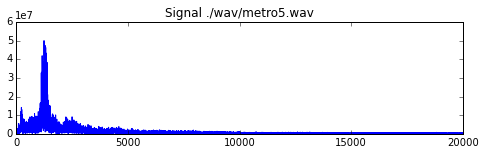

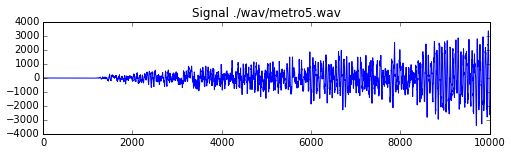

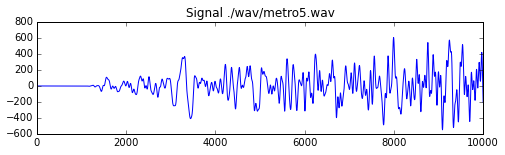

22050


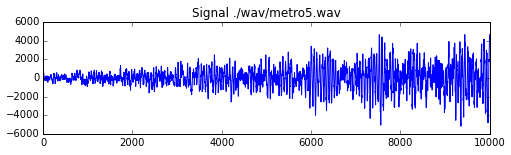

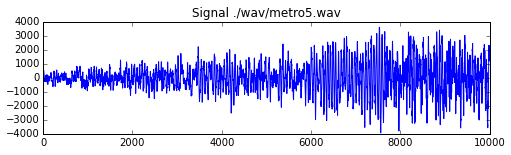

In [17]:
shift = 2500

def Kernel(N, a, m):
    return np.sqrt(a / np.pi) * np.exp(-a * (np.arange(2 * m + 1) - m) ** 2)

spectre = abs(np.fft.fft(signal))
print(np.argmax(spectre))

Plot({'Signal ' + wav_name: spectre[0:20000]})

smoothed = np.convolve(Kernel(len(signal), 0.001, 1000), signal, 'same')

result = signal[shift:] - signal[:-shift]
result_smoothed = signal[shift:] - smoothed[:-shift]

Plot({'Signal ' + wav_name: signal[:10000]})
Plot({'Signal ' + wav_name: smoothed[:10000]})
wavPlayer(signal, freq_sampling)
print(freq_sampling)
Plot({'Signal ' + wav_name: result[:10000]})
Plot({'Signal ' + wav_name: result_smoothed[:10000]})
wavPlayer(result, freq_sampling)
#wavPlayer(result_smoothed, freq_sampling)

N = 7905


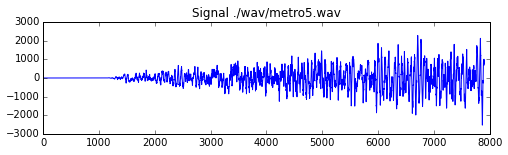

In [18]:
N = int(np.sqrt(5 * 10 ** 8 / 8))
print("N =", N)

signal = signal[:N]
Plot({'Signal ' + wav_name: -signal})
wavPlayer(-signal, freq_sampling)